## Titanic dataset playground

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the dataset

In [2]:
dataset = pd.read_csv('train_titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Translating categorical data into numeric and removing NaNs

In [3]:
dataset['Sex'] = dataset['Sex'].replace(['female', 'male'], [0, 1]) 

dataset['Embarked'] = dataset['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
dataset['Embarked'] = dataset['Embarked'].fillna(int(dataset['Embarked'].mean()))

dataset['Age'] = dataset['Age'].fillna(int(dataset['Age'].mean()))

dataset['Family'] = dataset['Parch'] + dataset['SibSp']

dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Parch', 'SibSp', 'SibSp'], axis=1, inplace=True)
dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,1,22.0,7.2500,0.0,1
1,1,1,0,38.0,71.2833,1.0,1
2,1,3,0,26.0,7.9250,0.0,0
3,1,1,0,35.0,53.1000,0.0,1
4,0,3,1,35.0,8.0500,0.0,0


### Data visualization

In [4]:
survivors = dataset[dataset['Survived'] == 1]
non_survivors = dataset[dataset['Survived'] == 0]

Text(0.5, 1.0, 'Is there a clear dependence between age, fair price and survival rate?')

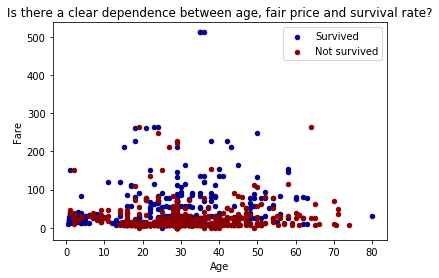

In [5]:
ax = survivors.plot.scatter(x='Age', y='Fare', color='DarkBlue', label='Survived')
non_survivors.plot.scatter(x='Age', y='Fare', color='DarkRed', label='Not survived', ax=ax)
plt.title("Is there a clear dependence between age, fair price and survival rate?")

#### Is there a correlation between sex and survival rate?

Text(0.5, 1.0, 'Is there a correlation between sex and survival rate?')

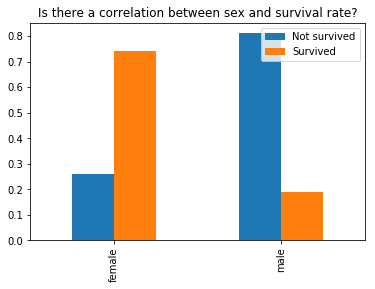

In [6]:
women = len(dataset[dataset['Sex'] == 0])
men = len(dataset[dataset['Sex'] == 1])

pd.DataFrame({
    'Survived': [
        survivors.loc[survivors['Sex'] == 0].count()[0] / women,
        survivors.loc[survivors['Sex'] == 1].count()[0] / men
    ],
    'Not survived': [
        non_survivors.loc[non_survivors['Sex'] == 0].count()[0] / women,
        non_survivors.loc[non_survivors['Sex'] == 1].count()[0] / men
    ]
}, index=['female', 'male']).plot.bar()

plt.title("Is there a correlation between sex and survival rate?")

Are kids more likely to survive?

Text(0.5, 1.0, 'Are kids more likely to survive?')

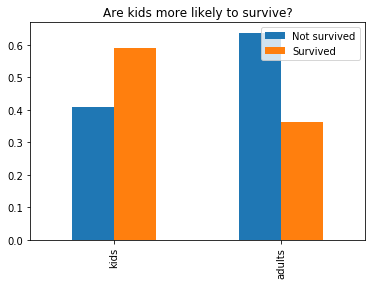

In [7]:
kids = len(dataset[dataset['Age'] < 16])
adults = len(dataset[dataset['Age'] >= 16])

pd.DataFrame({
    'Survived': [
        survivors.loc[survivors['Age'] < 16].count()[0] / kids,
        survivors.loc[survivors['Age'] >= 16].count()[0] / adults
    ],
    'Not survived': [
        non_survivors.loc[non_survivors['Age'] < 16].count()[0] / kids,
        non_survivors.loc[non_survivors['Age'] >= 16].count()[0] / adults
    ]
}, index=['kids', 'adults']).plot.bar()

plt.title("Are kids more likely to survive?")

Is there a correlation between travelling class and survival?

Text(0.5, 1.0, 'Is there a correlation between travelling class and survival?')

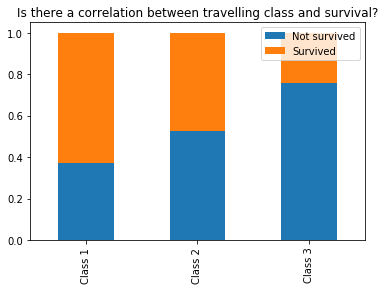

In [8]:
class1 = len(dataset[dataset['Pclass'] == 1])
class2 = len(dataset[dataset['Pclass'] == 2])
class3 = len(dataset[dataset['Pclass'] == 3])

pd.DataFrame({
    'Survived': [
        survivors.loc[survivors['Pclass'] == 1].count()[0] / class1,
        survivors.loc[survivors['Pclass'] == 2].count()[0] / class2,
        survivors.loc[survivors['Pclass'] == 3].count()[0] / class3
    ],
    'Not survived': [
        non_survivors.loc[non_survivors['Pclass'] == 1].count()[0] / class1,
        non_survivors.loc[non_survivors['Pclass'] == 2].count()[0] / class2,
        non_survivors.loc[non_survivors['Pclass'] == 3].count()[0] / class3
    ]
}, index=['Class 1', 'Class 2', 'Class 3']).plot.bar(stacked=True)

plt.title("Is there a correlation between travelling class and survival?")

### Trainig classifiers

#### Split data in training and testing dataset

In [10]:
numeric_datapoints = dataset[['Pclass', 'Age', 'Fare', 'Family', 'Sex', 'Embarked']]
labels = dataset['Survived']

training_size = int(numeric_datapoints.shape[0] * 0.9)
X_train = numeric_datapoints.head(training_size)
y_train = labels.head(training_size)

test_size = int(numeric_datapoints.shape[0] - training_size)
X_test = numeric_datapoints.tail(test_size).reset_index(drop = True)
y_test = labels.tail(test_size).reset_index(drop = True)

print("Training dataset size:   {}".format(training_size))
print("Testing dataset size:    {}".format(test_size))

Training dataset size:   801
Testing dataset size:    90


#### SVMs

In [11]:
from sklearn import svm

clf_svm = svm.SVC(gamma='auto', probability=True)
clf_svm.fit(X_train, y_train)

print("SVM accuracy on the test data: {}%".format(np.round(clf_svm.score(X_test, y_test) * 100, 2)))

SVM accuracy on the test data: 76.67%


####  Decision trees 
Implementation from scratch

In [13]:
import decision_trees

clf_dt = decision_trees.ClassificationDecisionTree()
clf_dt.train(X_train, y_train, max_depth = 6)
predictions = np.array([clf_dt.predict(X_test.loc[[i]]) for i in range(test_size)]).astype('int')

correct = np.equal(predictions, y_test)
accuracy = np.round(np.sum(correct) / len(correct) * 100, 2)
print('Decision tree accuracy on the test data:: {} %'.format(accuracy))

Decision tree accuracy on the test data:: 84.44 %


#### Random forests

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators = 10, max_features = 3)
clf_rf.fit(X_train, y_train)

accuracy = np.round(clf_rf.score(X_test, y_test) * 100, 2)
print("Random Forest accuracy on the test data: {}%".format(accuracy))

Random Forest accuracy on the test data: 84.44%


#### Ensemble models

In [16]:
from sklearn.ensemble import VotingClassifier

clf_voting = VotingClassifier(
    estimators=[
        ('svm', clf_svm),
        ('rf', clf_rf)
    ], voting='soft')
clf_voting.fit(X_train, y_train)

accuracy = np.round(clf_voting.score(X_test, y_test) * 100, 2)
print("Voting method accuracy on the test data: {}%".format(accuracy))

Voting method accuracy on the test data: 85.56%
